# 📣 원티드 크레딧잡 국민연금DB 유니콘 기업 찾기

## 💡 유니콘 기업의 의미

    ✔ 기업가치 10억달러 (약 한화 1조원) 이상 
    ✔ 창업한지 10년 이내
    ✔ 비상장 스타트업
    

<img src='유니콘표.PNG' style='width:800px'>

### 🔎 데이터 살펴보기

In [5]:
import pandas as pd
import numpy as np

from matplotlib import rcParams
from matplotlib import font_manager, rc
import seaborn as sns
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [6]:
raw_data = pd.read_csv('company_nps_data.csv',encoding='CP949')
raw_data

# 연매출액(천원 단위)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [7]:
raw_data.isna().sum()

# 결측치는 없다.

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [9]:
raw_data['회사ID'].nunique()

# 회사 수는 5000개. 회사당 평균 약 20개월의 데이터가 존재

5000

### 🔧 데이터 전처리

In [10]:
# 년도, 월을 합쳐서 하나의 datatime으로 나타내기
# 그래프 그릴 때 편하려고

from datetime import datetime

def to_datetime(data):
    
    s = str(data['년도']) + '-' + str(data['월'])
    s = datetime.strptime(s, '%Y-%m')
    
    return s

In [11]:
raw_data['시간'] = raw_data.apply(to_datetime, axis=1)
raw_data

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,시간
0,233757,41688077,2018,7,8912380,36,2018-07-01
1,123464,1760695,2018,3,942380,5,2018-03-01
2,342124,3221341,2018,7,781180,4,2018-07-01
3,386420,4815584,2015,11,3795900,14,2015-11-01
4,129243,9799736,2018,10,40724680,151,2018-10-01
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,2017-02-01
99797,239388,1045021,2018,10,1428800,9,2018-10-01
99798,272304,181898,2018,3,392560,4,2018-03-01
99799,362194,2100218,2018,12,874780,3,2018-12-01


### 🤔 국민연금은 임금의 일정 퍼센트를 납입하는 것이므로 임금이 높다면 연금 또한 높다. 
따라서 직원당 평균 연금을 비교하여 평균 임금을 비교할 수 있으며  임금이 높다면 그만큼 유능한 직원을 뽑는데에 투자를 했다는 것을 의미한다.

In [12]:
# 직원당 평균 연금을 추가하여 임금수준을 확인하는데 사용한다.
raw_data['직원당_연금보험료'] = raw_data['월별_연금보험료'] / raw_data['월별_직원수']
raw_data

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,시간,직원당_연금보험료
0,233757,41688077,2018,7,8912380,36,2018-07-01,247566.111111
1,123464,1760695,2018,3,942380,5,2018-03-01,188476.000000
2,342124,3221341,2018,7,781180,4,2018-07-01,195295.000000
3,386420,4815584,2015,11,3795900,14,2015-11-01,271135.714286
4,129243,9799736,2018,10,40724680,151,2018-10-01,269699.867550
...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,2017-02-01,218430.909091
99797,239388,1045021,2018,10,1428800,9,2018-10-01,158755.555556
99798,272304,181898,2018,3,392560,4,2018-03-01,98140.000000
99799,362194,2100218,2018,12,874780,3,2018-12-01,291593.333333


In [13]:
raw_data['직원당_매출'] = raw_data['연매출액'] / raw_data['월별_직원수']
raw_data

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,시간,직원당_연금보험료,직원당_매출
0,233757,41688077,2018,7,8912380,36,2018-07-01,247566.111111,1.158002e+06
1,123464,1760695,2018,3,942380,5,2018-03-01,188476.000000,3.521390e+05
2,342124,3221341,2018,7,781180,4,2018-07-01,195295.000000,8.053352e+05
3,386420,4815584,2015,11,3795900,14,2015-11-01,271135.714286,3.439703e+05
4,129243,9799736,2018,10,40724680,151,2018-10-01,269699.867550,6.489891e+04
...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,2017-02-01,218430.909091,4.209656e+05
99797,239388,1045021,2018,10,1428800,9,2018-10-01,158755.555556,1.161134e+05
99798,272304,181898,2018,3,392560,4,2018-03-01,98140.000000,4.547450e+04
99799,362194,2100218,2018,12,874780,3,2018-12-01,291593.333333,7.000727e+05


In [15]:
# 회사ID, 시간순으로 정렬

raw_data = raw_data.sort_values(['회사ID', '시간']).reset_index(drop=True)
raw_data

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,시간,직원당_연금보험료,직원당_매출
0,63,11328779396,2018,1,403119840,1006,2018-01-01,400715.546720,1.126121e+07
1,63,11328779396,2018,2,406770960,1018,2018-02-01,399578.546169,1.112847e+07
2,63,11328779396,2018,3,404826240,1013,2018-03-01,399631.036525,1.118340e+07
3,63,11328779396,2018,4,404211800,1012,2018-04-01,399418.774704,1.119445e+07
4,63,11328779396,2018,5,400339640,1002,2018-05-01,399540.558882,1.130617e+07
...,...,...,...,...,...,...,...,...,...
99796,3312354,1451563,2019,9,1312200,3,2019-09-01,437400.000000,4.838543e+05
99797,3312354,1451563,2019,10,1312200,3,2019-10-01,437400.000000,4.838543e+05
99798,3312354,1451563,2019,11,1312200,3,2019-11-01,437400.000000,4.838543e+05
99799,3312354,1451563,2019,12,1312200,3,2019-12-01,437400.000000,4.838543e+05


### 📊 데이터 분석

In [17]:
# 직원수를 그래프로 나타내는 함수

def draw_employees(data):
    rcParams['figure.figsize'] = 16,9
    plt.xlabel('시간')
    plt.ylabel('직원수')
    plt.title('직원수 변화 추이')
    
    ax = sns.lineplot(data=data.pivot("시간", "회사ID", "월별_직원수"))

    plt.xticks(rotation="45")

    plt.show()

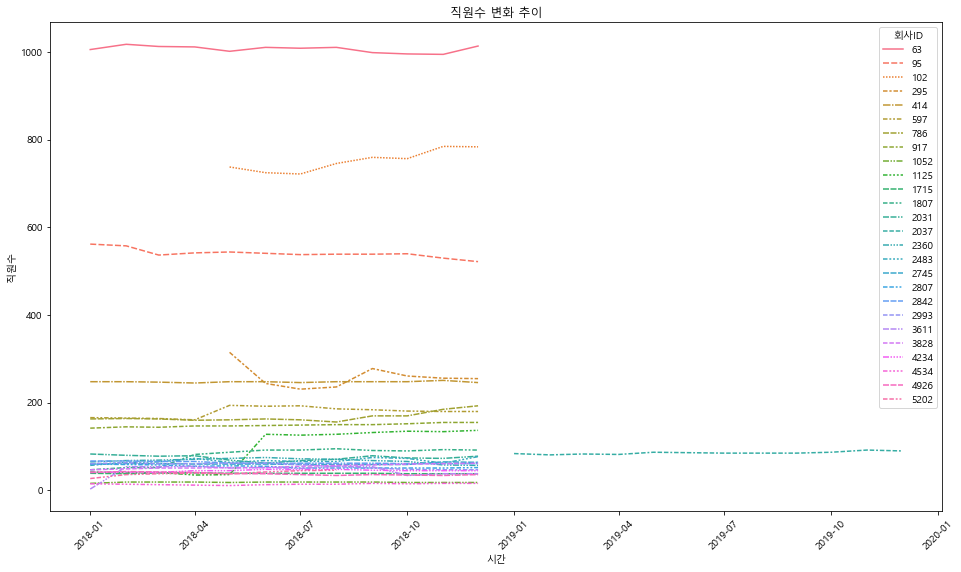

In [18]:
draw_employees(raw_data.iloc[:300, :])

### 🤔300개의 직원수 데이터를 그래프로 그려봤다.

규모가 작은 회사가 많고 1년이하의 데이터를 가진 회사가 많음을 확인할 수 있다.

## 💡 유니콘 기업의 특징

    ✔ 기업가치에 비해 매출액이 적다.
    ✔ 그래도 어느정도 규모는 있다. 여기서 규모는 매출, 직원수, 사업기간등을 포함한다. (국내 유니콘 기업기준 최소 매출 279억, 최소 직원수 153명)
    ✔ 규모가 제한적이다. (최대 매출 약 7조, 최대 직원수 약 9000명)
    ✔ 사업기간이 너무 길지도 짧지도 않다.
    ✔ 성장세가 가파른 구간이 있다.
    

## 📜 분석 방법
    1. 적당한 규모에 해당하는 기업을 필터링한다.
    2. 필터링된 기업들의 성장세를 국내 유니콘 기업의 성장세와 비교하여 유사한 기업을 찾아낸다.

### 1. 적당한 규모에 해당하는 기업을 필터링한다.

In [19]:
# 가장 최근의 규모를 확인하기 위해 last()를 사용했다.

data_group = raw_data.groupby(['회사ID']).last()
data_group

,연매출액,년도,월,월별_연금보험료,월별_직원수,시간,직원당_연금보험료,직원당_매출
회사ID,,,,,,,,
63,11328779396,2018,12,419953960,1014,2018-12-01,414155.779093,1.117237e+07
95,656947437,2018,12,211122800,522,2018-12-01,404449.808429,1.258520e+06
102,742658938,2018,12,178682220,784,2018-12-01,227910.994898,9.472691e+05
295,83776697,2018,12,73774760,255,2018-12-01,289312.784314,3.285361e+05
414,19732769,2018,12,79522000,246,2018-12-01,323260.162602,8.021451e+04
...,...,...,...,...,...,...,...,...
2400284,1263406,2018,10,549080,3,2018-10-01,183026.666667,4.211353e+05
2437574,214016,2018,5,636740,3,2018-05-01,212246.666667,7.133867e+04
2693684,238076,2019,12,438120,3,2019-12-01,146040.000000,7.935867e+04


In [20]:
data_group.sort_values(by='연매출액', ascending=False)

# 최대 매출 11조, 최소 매출 30만

,연매출액,년도,월,월별_연금보험료,월별_직원수,시간,직원당_연금보험료,직원당_매출
회사ID,,,,,,,,
63,11328779396,2018,12,419953960,1014,2018-12-01,414155.779093,1.117237e+07
419945,10058868796,2019,12,952530380,2872,2019-12-01,331660.995822,3.502392e+06
227415,5521038494,2018,12,918867780,2333,2018-12-01,393856.742392,2.366497e+06
227414,4933525226,2018,12,964790780,2435,2018-12-01,396217.979466,2.026088e+06
419977,4157069000,2018,12,403793080,1205,2018-12-01,335097.991701,3.449850e+06
...,...,...,...,...,...,...,...,...
413746,2000,2015,12,407960,4,2015-12-01,101990.000000,5.000000e+02
570867,1500,2019,12,904500,4,2019-12-01,226125.000000,3.750000e+02
552832,1471,2018,10,692540,3,2018-10-01,230846.666667,4.903333e+02


In [28]:
data_group.sort_values(by='월별_직원수', ascending=False)

# 최대 직원수 2872명, 최소 직원수 0명

,연매출액,년도,월,월별_연금보험료,월별_직원수,시간,직원당_연금보험료,직원당_매출
회사ID,,,,,,,,
419945,10058868796,2019,12,952530380,2872,2019-12-01,331660.995822,3.502392e+06
469458,113442446,2017,12,527191920,2723,2017-12-01,193607.021667,4.166083e+04
227414,4933525226,2018,12,964790780,2435,2018-12-01,396217.979466,2.026088e+06
227415,5521038494,2018,12,918867780,2333,2018-12-01,393856.742392,2.366497e+06
294337,287134819,2018,12,489855720,2258,2018-12-01,216942.302923,1.271633e+05
...,...,...,...,...,...,...,...,...
288014,3709457,2016,11,0,0,2016-11-01,NaN,inf
157237,27020003,2017,5,0,0,2017-05-01,142613.333333,inf
602137,892176,2018,6,0,0,2018-06-01,NaN,inf


In [21]:
# 몇 개의 데이터가 있는지 체크하기 위해 사용
data_group_count = raw_data.groupby(['회사ID']).count()
data_group_count

,연매출액,년도,월,월별_연금보험료,월별_직원수,시간,직원당_연금보험료,직원당_매출
회사ID,,,,,,,,
63,12,12,12,12,12,12,12,12
95,12,12,12,12,12,12,12,12
102,8,8,8,8,8,8,8,8
295,8,8,8,8,8,8,8,8
414,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...
2400284,7,7,7,7,7,7,7,7
2437574,1,1,1,1,1,1,1,1
2693684,6,6,6,6,6,6,6,6


### 적당한 범위에 해당하는 기업들을 골라낸다.

In [30]:
# 어느정도 규모는 있어야 한다. 매출 250억 초과 (에이프로젠의 최소 매출) / 직원수 150명 초과(지피클럽, 엘엔피코스메틱)
# / 데이터 24개월 이상 (연매출의 성장세를 보기위해서 최소한 두개는 존재해야 한다고 판단)

over_list = data_group[(data_group['연매출액'] > 25000000) & (data_group['월별_직원수'] > 150) & 
                       (data_group_count['연매출액'] >= 24) & (data_group['연매출액'] < 8000000000)].index.unique()
print(over_list)
print(len(over_list))

Int64Index([126516, 126521, 126538, 126606, 126664, 126674, 126772, 126802,
            126814, 126831, 126983, 127060, 127065, 127090, 127142, 127180,
            127366, 127503, 127511, 127669, 127732, 127839, 128076, 128149,
            128264, 128405, 128415, 128440, 128485, 128539, 128638, 128723,
            128916, 227414, 227415, 231080, 231090, 231173, 294337, 294367,
            294387, 294530, 294620, 294649, 294790, 380843, 381180, 394696,
            394723, 403351, 403359, 403434, 403462, 403470, 403504, 403522,
            403657, 403771, 419977, 419998, 420008, 420046, 420076, 420082,
            420147, 420165, 426429, 440030, 440094, 469458, 469473, 469556,
            469567, 469677, 470125, 510329],
           dtype='int64', name='회사ID')
76


#### 필터링된 기업 수는 총 76개이다.

### 2. 국내 유니콘 기업의 성장세와 비교하여 유사한 기업을 찾는다.

#### 📈 유니콘 기업은 높은 성장세를 보일것이다?
|배민 매출|직원수|급여|
|:-:|:-:|:-:|
|<img src='배민 매출.jpg' style='width:300px'>|<img src='배민직원수.PNG' style='width:300px'>|<img src='배민급여.PNG' style='width:300px'>
|무신사 매출|직원수|급여|
|<img src='무신사매출.jpg' style='width:300px'>|<img src='무신사직원수.PNG' style='width:300px'>|<img src='무신사급여.PNG' style='width:300px'>
|티몬 매출|직원수|급여|
|<img src='티몬매출.png' style='width:300px'>|<img src='티몬직원수.PNG' style='width:300px'>|<img src='티몬급여.PNG' style='width:300px'>
|위메프 매출|직원수|급여|
|<img src='위메프매출.jpg' style='width:300px'>|<img src='위메프직원수.PNG' style='width:300px'>|<img src='위메프급여.PNG' style='width:300px'>

    ✔ 배민, 무신사 등 다수의 유니콘 기업이 매출, 직원수, 급여 면에서 급격한 성장을 보여준다.
    ✔ 반면 티몬, 위메프, 옐로모바일 등 몇개의 기업은 오히려 거품빠지면서 급격히 성장세가 꺾이는 모습을 보여주며 오히려 규모가 작아지거나 유지한다.
    
#### 포인트는 급격한 변화가 발생한다는 것

In [32]:
data = pd.DataFrame(index=over_list, columns=['년수', '매출증가량', '직원증가량', '임금증가량', '직원당매출증가량', '매출증가량평균(절댓값)'], dtype=float)

In [34]:
# 매출증가량 : (마지막년도 매출 - 첫년도 매출) / 첫년도 매출 * 100
# 직원증가량 : (마지막년도 직원수 - 첫년도 직원수) / 첫년도 직원수 * 100
# 임금증가량 : (마지막년도 연금 - 첫년도 연금) / 첫년도 연금 * 100
# 매출증가량평균(절댓값) : 매년 매출증가량의 절댓값 합을 년수로 나눔. 티몬같이 매출이 급격히 증가하고 감소한 경우를 잡기 위해 추가함.

for id in over_list:
    temp = raw_data[raw_data['회사ID'] == id]

    first = temp.iloc[0, :]
    last = temp.iloc[-1, :]
    
    sales = temp.연매출액.unique()
    sales_growth = 0 # 매출 변화량 절댓값의 평균
    for idx in range(len(sales)-1):
#         print(sales[idx+1], sales[idx])
        sales_growth += abs( (sales[idx+1] - sales[idx]) / sales[idx] * 100 )
    
    print(id, '기업')
    print(last.년도 - first.년도, '년간','매출증가량 : ', round((last.연매출액 - first.연매출액) / first.연매출액 * 100.0, 2))
    print('직원증가량 : ', round((last.월별_직원수 - first.월별_직원수) / first.월별_직원수 * 100.0, 2))
    print('임금증가량 : ', round((last.직원당_연금보험료 - first.직원당_연금보험료) / first.직원당_연금보험료 * 100.0,2))
    print('직원당매출증가량 : ', round((last.직원당_매출 - first.직원당_매출) / first.직원당_매출 * 100.0,2))
    print('매출증가량평균(절댓값) : ', round(sales_growth, 2))
    print('--------------------------------------------------------')
    
    data.loc[id, :] = [last.년도 - first.년도, round((last.연매출액 - first.연매출액) / first.연매출액 * 100.0, 2), 
                      round((last.월별_직원수 - first.월별_직원수) / first.월별_직원수 * 100.0, 2), 
                      round((last.직원당_연금보험료 - first.직원당_연금보험료) / first.직원당_연금보험료 * 100.0,2),
                      round((last.직원당_매출 - first.직원당_매출) / first.직원당_매출 * 100.0,2),
                      round(sales_growth/ (last.년도 - first.년도), 2)]

126516 기업
2 년간 매출증가량 :  -62.08
직원증가량 :  -55.44
임금증가량 :  7.7
직원당매출증가량 :  -14.91
매출증가량평균(절댓값) :  69.98
--------------------------------------------------------
126521 기업
3 년간 매출증가량 :  -0.12
직원증가량 :  -6.3
임금증가량 :  9.5
직원당매출증가량 :  6.6
매출증가량평균(절댓값) :  4.58
--------------------------------------------------------
126538 기업
3 년간 매출증가량 :  19.25
직원증가량 :  9.26
임금증가량 :  11.65
직원당매출증가량 :  9.14
매출증가량평균(절댓값) :  18.38
--------------------------------------------------------
126606 기업
3 년간 매출증가량 :  10.51
직원증가량 :  -2.81
임금증가량 :  13.04
직원당매출증가량 :  13.7
매출증가량평균(절댓값) :  10.23
--------------------------------------------------------
126664 기업
3 년간 매출증가량 :  37.95
직원증가량 :  18.11
임금증가량 :  9.2
직원당매출증가량 :  16.8
매출증가량평균(절댓값) :  34.33
--------------------------------------------------------
126674 기업
3 년간 매출증가량 :  10.34
직원증가량 :  -8.42
임금증가량 :  12.39
직원당매출증가량 :  20.48
매출증가량평균(절댓값) :  13.09
--------------------------------------------------------
126772 기업
3 년간 매출증가량 :  -8.22
직원증가량 :  91.17
임금증가량 :  13.32
직원당매출증가량 

In [35]:
data

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값)
회사ID,,,,,,
126516,2.0,-62.08,-55.44,7.70,-14.91,34.99
126521,3.0,-0.12,-6.30,9.50,6.60,1.53
126538,3.0,19.25,9.26,11.65,9.14,6.13
126606,3.0,10.51,-2.81,13.04,13.70,3.41
126664,3.0,37.95,18.11,9.20,16.80,11.44
...,...,...,...,...,...,...
469556,3.0,-2.08,-5.16,22.53,3.25,10.76
469567,2.0,22.73,-36.43,43.18,93.07,13.49
469677,3.0,122.16,64.76,-0.49,34.84,30.63


In [36]:
data.sort_values('매출증가량', ascending=False)

# 최대 매출 증가량 1419%, 최소 매출 증가량 -62%

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값)
회사ID,,,,,,
294620,3.0,1419.82,7.48,8.65,1314.05,482.02
403470,3.0,398.90,520.90,-0.80,-19.65,83.17
127366,3.0,270.90,29.92,6.43,185.49,62.37
294337,3.0,179.91,87.85,6.57,49.01,41.12
128405,3.0,160.01,37.14,5.26,89.59,38.46
...,...,...,...,...,...,...
294790,3.0,-39.23,-3.08,29.94,-37.30,115.64
403522,2.0,-39.50,-27.95,3.70,-16.03,21.97
127839,3.0,-40.87,13.24,20.16,-47.78,25.88


In [37]:
data.sort_values('직원증가량', ascending=False)

# 최대 직원 증가량 1147%, 최소 직원 증가량 -55%

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값)
회사ID,,,,,,
380843,2.0,46.82,1147.52,-18.65,-88.23,23.41
403470,3.0,398.90,520.90,-0.80,-19.65,83.17
440094,3.0,116.46,110.11,27.79,3.02,29.45
420008,2.0,-12.61,108.29,16.95,-58.04,13.54
127503,3.0,63.08,98.12,18.47,-17.69,18.28
...,...,...,...,...,...,...
403522,2.0,-39.50,-27.95,3.70,-16.03,21.97
127065,3.0,13.31,-32.43,21.45,67.71,7.35
469567,2.0,22.73,-36.43,43.18,93.07,13.49


In [38]:
data.sort_values('임금증가량', ascending=False)

# 최대 임금 증가량 43%, 최소 임금 증가량 -18%

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값)
회사ID,,,,,,
469567,2.0,22.73,-36.43,43.18,93.07,13.49
420076,2.0,-35.28,-38.10,35.93,4.55,19.45
294790,3.0,-39.23,-3.08,29.94,-37.30,115.64
420147,2.0,17.95,15.53,28.65,2.09,8.97
440094,3.0,116.46,110.11,27.79,3.02,29.45
...,...,...,...,...,...,...
394723,3.0,12.87,1.31,-0.01,11.41,4.14
403504,3.0,38.71,9.73,-0.36,26.42,16.45
469677,3.0,122.16,64.76,-0.49,34.84,30.63


In [39]:
data.sort_values('직원당매출증가량', ascending=False)

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값)
회사ID,,,,,,
294620,3.0,1419.82,7.48,8.65,1314.05,482.02
127366,3.0,270.90,29.92,6.43,185.49,62.37
469567,2.0,22.73,-36.43,43.18,93.07,13.49
128405,3.0,160.01,37.14,5.26,89.59,38.46
127065,3.0,13.31,-32.43,21.45,67.71,7.35
...,...,...,...,...,...,...
127839,3.0,-40.87,13.24,20.16,-47.78,25.88
126772,3.0,-8.22,91.17,13.32,-51.99,7.10
426429,3.0,-43.38,33.11,0.01,-57.47,33.67


In [40]:
data.sort_values('매출증가량평균(절댓값)', ascending=False)

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값)
회사ID,,,,,,
294620,3.0,1419.82,7.48,8.65,1314.05,482.02
294790,3.0,-39.23,-3.08,29.94,-37.30,115.64
403470,3.0,398.90,520.90,-0.80,-19.65,83.17
127366,3.0,270.90,29.92,6.43,185.49,62.37
294337,3.0,179.91,87.85,6.57,49.01,41.12
...,...,...,...,...,...,...
419977,2.0,-4.09,-12.17,20.96,9.20,2.07
128076,3.0,6.09,5.26,18.39,0.79,1.99
419998,2.0,-0.14,3.44,11.14,-3.46,1.97


#### 유니콘 기업의 특징

    - 미래 성장가치가 기업가치에 투자되어 매출이 절대적으로 중요한 요소는 아니다.
    - 하지만 매출의 성장세는 성장가치가 유효한지 판단하는 근거이므로 기업가치에 중요한 요소이다.
    - 지금까지 성장하는 모습만 보여준 기업도 있지만 급격히 하락세를 겪는 기업도 존재한다.


    여기서 케이스 분류를 해볼 수 있다.
    1. 매출 증가, 규모 확대 : 유니콘일수도 아닐수도
    2. 매출 증가, 규모 축소 : 유니콘이 아니다. (성장세를 이어가야하기 때문)
    3. 매출 감소, 규모 확대 : 유니콘이 아니다. (하락세일 경우 투자자금이 준다.)
    4. 매출 감소, 규모 축소 : 유니콘일수도 아닐수도

In [42]:
def case(data):
    if data['매출증가량'] > 0:
        if data['직원증가량'] + data['임금증가량'] > 0:
            return 1
        else:
            return 2
    else :
        if data['직원증가량'] + data['임금증가량'] > 0:
            return 3
        else:
            return 4

In [43]:
data['케이스'] = data.apply(case, axis=1)
data

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
126516,2.0,-62.08,-55.44,7.70,-14.91,34.99,4
126521,3.0,-0.12,-6.30,9.50,6.60,1.53,3
126538,3.0,19.25,9.26,11.65,9.14,6.13,1
126606,3.0,10.51,-2.81,13.04,13.70,3.41,1
126664,3.0,37.95,18.11,9.20,16.80,11.44,1
...,...,...,...,...,...,...,...
469556,3.0,-2.08,-5.16,22.53,3.25,10.76,3
469567,2.0,22.73,-36.43,43.18,93.07,13.49,1
469677,3.0,122.16,64.76,-0.49,34.84,30.63,1


In [44]:
data.케이스.value_counts()

1    53
3    17
4     4
2     2
Name: 케이스, dtype: int64

In [45]:
case_list = data[(data['케이스'] == 1) | (data['케이스'] == 4)].index
len(case_list)

# 해당하는 경우는 총 57개

57

In [47]:
# 급격한 변화량

last_list = data[(data.index.isin(case_list)) & (data['매출증가량평균(절댓값)'] > 20)].index
len(last_list)

19

In [69]:
def draw_graphs(data):
    rcParams['figure.figsize'] = 16,4
    plt.subplot(1,3,1)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.title('연매출')
    ax = sns.lineplot(data=data.set_index('시간')['연매출액'])
    plt.xticks(rotation="45")

    plt.subplot(1,3,2)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.title('직원수')
    ax = sns.lineplot(data=data.set_index('시간')['월별_직원수'])
    plt.xticks(rotation="45")
    
    plt.subplot(1,3,3)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.title('임금')
    ax = sns.lineplot(data=data.set_index('시간')['직원당_연금보험료'])
    plt.xticks(rotation="45")
    
    plt.show()

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
126516,2.0,-62.08,-55.44,7.7,-14.91,34.99,4


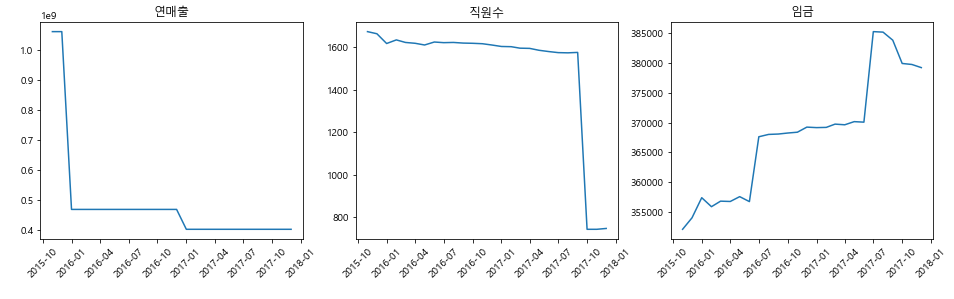

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
126802,3.0,44.34,52.67,17.0,-5.46,38.85,1


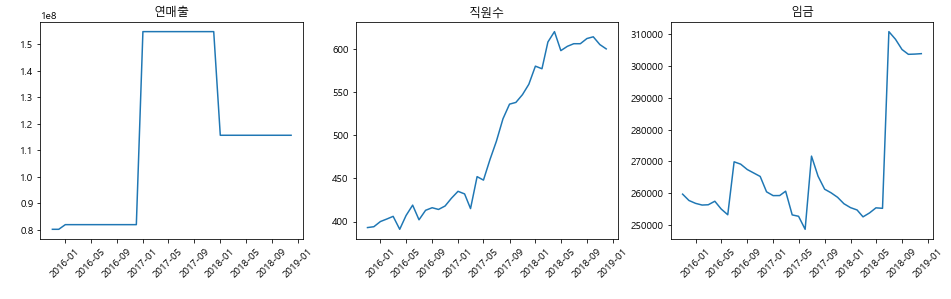

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
126814,3.0,48.91,4.76,16.71,42.14,20.76,1


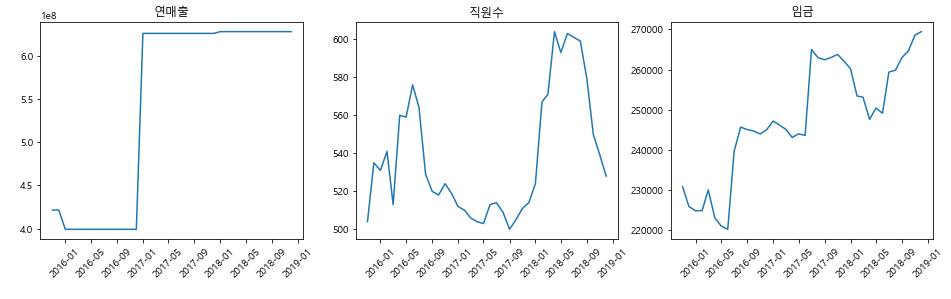

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
127090,3.0,50.33,-4.5,12.5,57.41,31.78,1


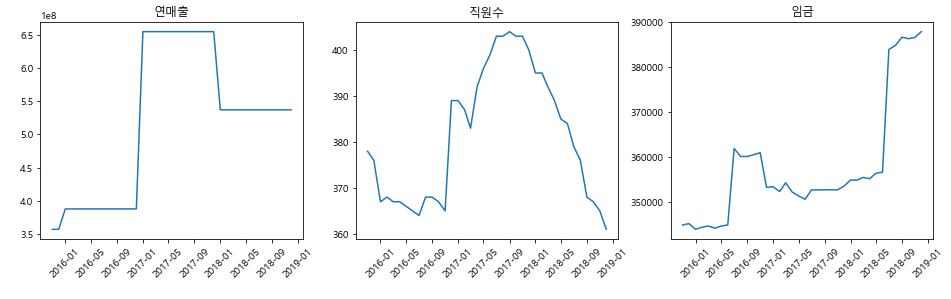

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
127366,3.0,270.9,29.92,6.43,185.49,62.37,1


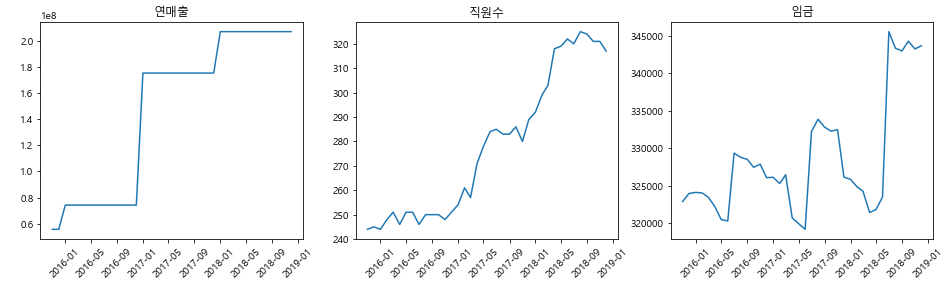

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
128264,3.0,71.57,7.69,15.15,59.31,20.74,1


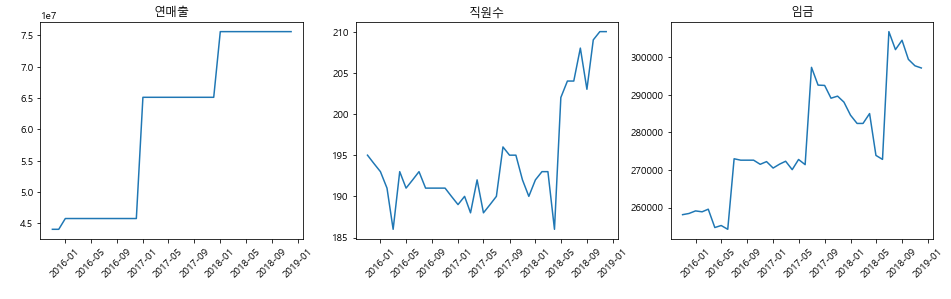

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
128405,3.0,160.01,37.14,5.26,89.59,38.46,1


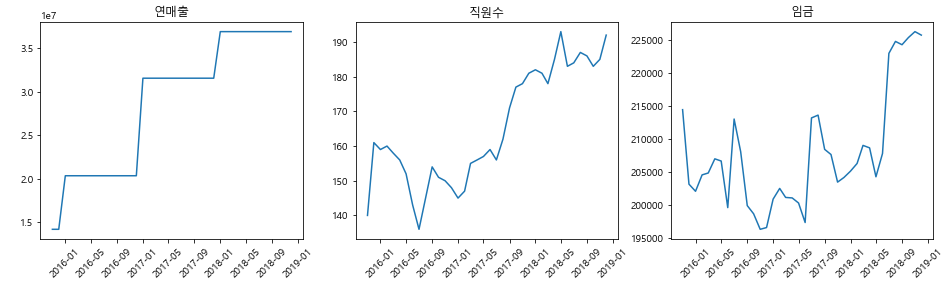

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
231090,3.0,106.7,24.87,7.39,65.53,30.15,1


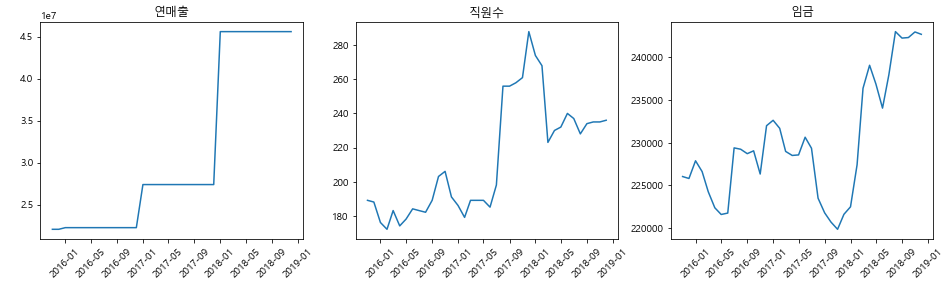

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
231173,3.0,-17.39,-15.62,12.35,-2.09,28.95,4


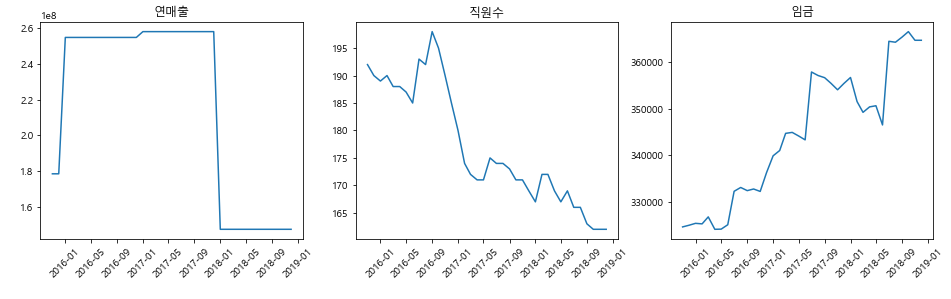

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
294337,3.0,179.91,87.85,6.57,49.01,41.12,1


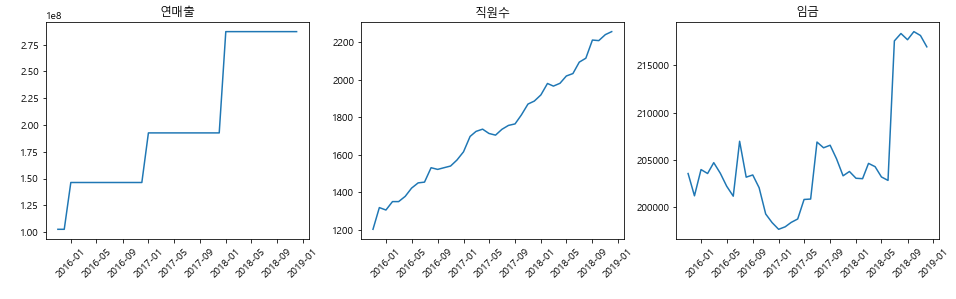

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
294620,3.0,1419.82,7.48,8.65,1314.05,482.02,1


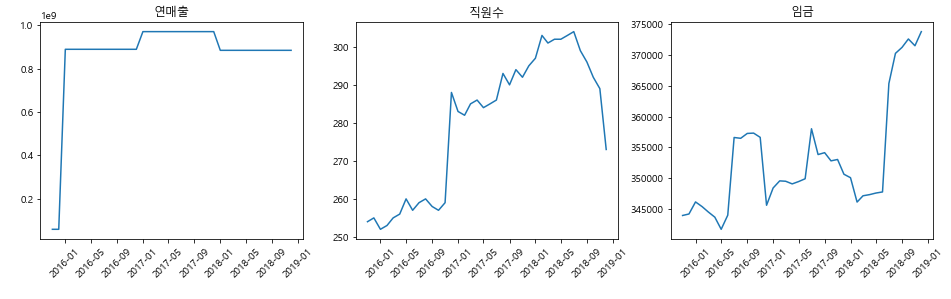

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
380843,2.0,46.82,1147.52,-18.65,-88.23,23.41,1


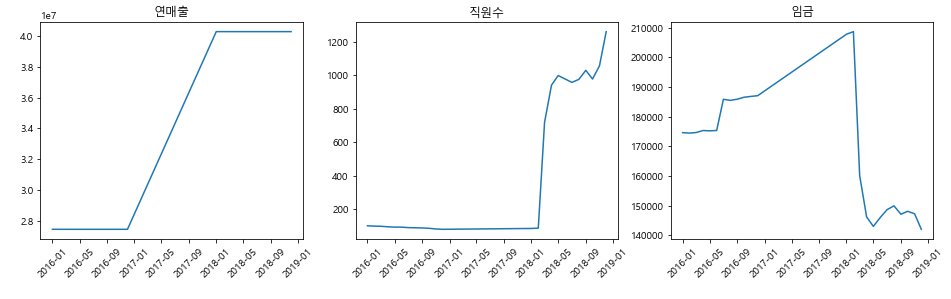

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
403470,3.0,398.9,520.9,-0.8,-19.65,83.17,1


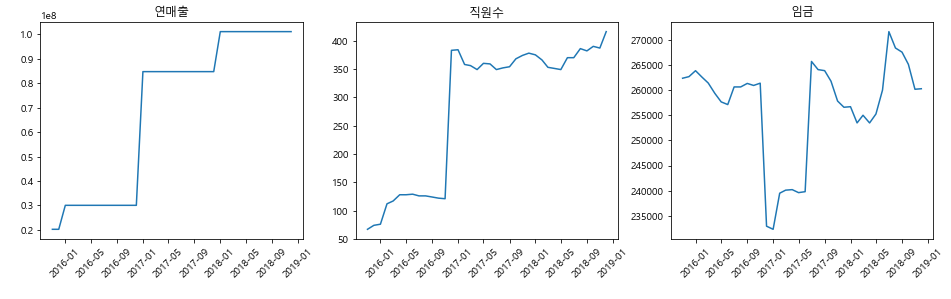

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
403522,2.0,-39.5,-27.95,3.7,-16.03,21.97,4


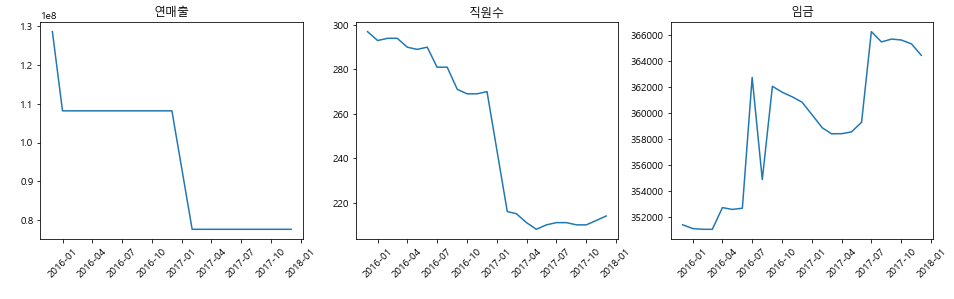

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
420046,2.0,53.33,15.2,7.77,33.1,23.83,1


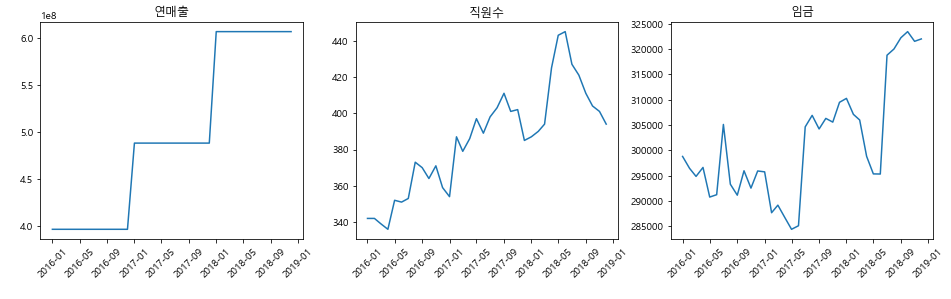

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
420165,3.0,108.76,26.62,17.61,64.86,31.79,1


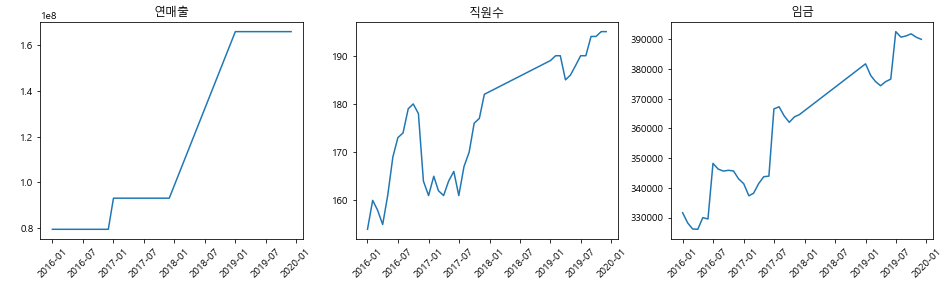

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
440094,3.0,116.46,110.11,27.79,3.02,29.45,1


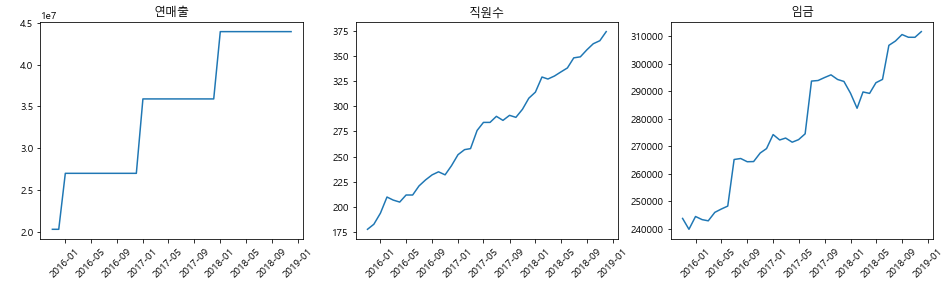

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
469677,3.0,122.16,64.76,-0.49,34.84,30.63,1


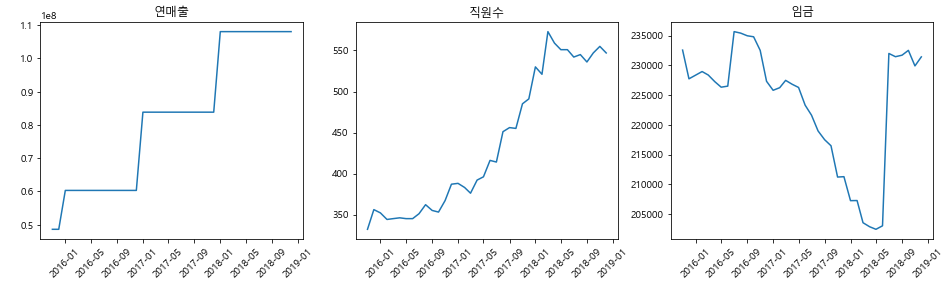

,년수,매출증가량,직원증가량,임금증가량,직원당매출증가량,매출증가량평균(절댓값),케이스
회사ID,,,,,,,
470125,3.0,87.12,13.73,22.92,64.54,24.19,1


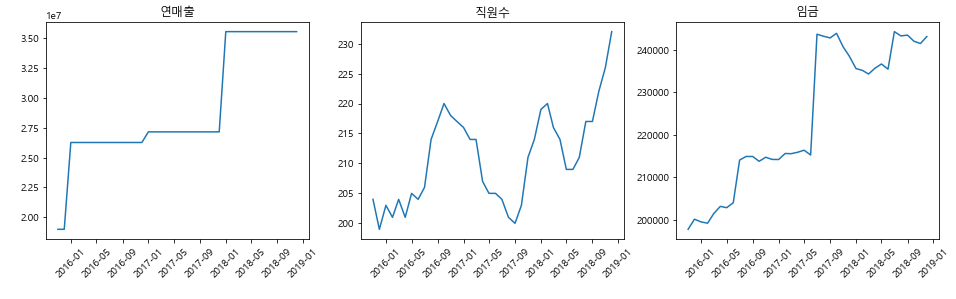

In [70]:
for id in last_list:
    
    display(data[data.index == id])
    draw_graphs(raw_data[raw_data['회사ID'] == id])

한번 하락한 경우 다시 상승하는 케이스는 없으므로 제외
너무 빨리 매출 하락이 발생한 경우도 케이스 없으므로 제외
변화가 더딘 경우 제외

## 결과 : 